<a href="https://colab.research.google.com/github/vkjadon/sklearn/blob/main/Ex5-DigitsCompare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import time

In [ ]:
# The digits dataset
digits = datasets.load_digits()
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [ ]:
# Split into train and test subsets (50% each)
XA, XB, yA, yB = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)
print(XA.shape)

(898, 64)


In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs',multi_class='auto',max_iter=2000)
lr.fit(XA,yA)

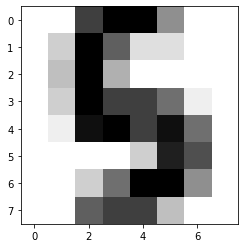

 predicts: 5
Label: 5


In [ ]:
n = np.random.randint(int(n_samples/2),n_samples)
Xt = digits.data[n:n+1]
plt.imshow(digits.images[n], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()
yt = lr.predict(Xt)
print(' predicts: ' + str(yt[0]))
print('Label: ' + str(digits.target[n:n+1][0]))

In [ ]:
# Naïve Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [ ]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='modified_huber', shuffle=True,random_state=101,\
                    tol=1e-3,max_iter=1000)

In [ ]:
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=10,random_state=101,\
                               max_features=None,min_samples_leaf=5)

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rfm = RandomForestClassifier(n_estimators=70,oob_score=True,n_jobs=1,\
                  random_state=101,max_features=None,min_samples_leaf=3)

In [ ]:
# Support Vector Classifier
from sklearn.svm import SVC
svm = SVC(gamma='scale', C=1.0, random_state=101)

In [ ]:
# Neural Network
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(solver='lbfgs',alpha=1e-5,max_iter=200,\
                    activation='relu',hidden_layer_sizes=(10,30,10),\
                    random_state=1, shuffle=True)

In [ ]:
# classification methods
m = [nb,lr,sgd,knn,dtree,rfm,svm,nn]
s = ['nb','lr','sgd','knn','dt','rfm','svm','nn']

In [ ]:
# fit classifiers
print('Train Classifiers')
for i,x in enumerate(m):
    st = time.time()
    x.fit(XA,yA)
    tf = str(round(time.time()-st,5))
    print(s[i] + ' time: ' + tf)

Train Classifiers
nb time: 0.00602
lr time: 2.88297
sgd time: 0.04359
knn time: 0.00075
dt time: 0.01419
rfm time: 0.59561
svm time: 0.02995
nn time: 1.03651


In [ ]:
# test on random number in second half of data
n = np.random.randint(int(n_samples/2),n_samples)
Xt = digits.data[n:n+1]

Test Classifiers
nb predicts: 3 time: 0.00204
lr predicts: 9 time: 0.00038
sgd predicts: 9 time: 0.00023
knn predicts: 9 time: 0.00773
dt predicts: 9 time: 0.00028
rfm predicts: 9 time: 0.01427
svm predicts: 9 time: 0.00053
nn predicts: 9 time: 0.00036
Label: 9


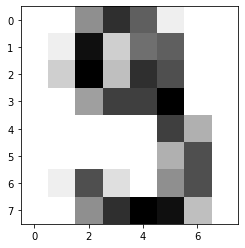

In [ ]:
# test classifiers
print('Test Classifiers')
for i,x in enumerate(m):
    st = time.time()
    yt = x.predict(Xt)
    tf = str(round(time.time()-st,5))
    print(s[i] + ' predicts: ' + str(yt[0]) + ' time: ' + tf)
print('Label: ' + str(digits.target[n:n+1][0]))

plt.imshow(digits.images[n], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()
